In [2]:
#Youtube: https://www.youtube.com/watch?v=vSzou5zRwNQ&ab_channel=ComputerScience

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
Data = pd.read_csv('test.csv')

In [5]:
Data.head

<bound method NDFrame.head of         name_to_be_deleted     energy  atomic_charge      pca1      pca2  \
0       acetaldehyde_0_015  38.145186         36.858  0.842478 -0.531219   
1       acetaldehyde_0_015   0.573634          0.500  0.463587  0.636512   
2       acetaldehyde_0_015   0.580474          0.500  0.264339  0.540745   
3       acetaldehyde_0_015  37.980501         36.858  0.029224  0.103269   
4       acetaldehyde_0_015  75.370940         73.517  0.044843  0.049145   
..                     ...        ...            ...       ...       ...   
984  propionaldehyde_m062x   0.584652          0.500  0.049468  0.111188   
985  propionaldehyde_m062x   0.582242          0.500  0.042805  0.055675   
986  propionaldehyde_m062x  37.980621         36.858  0.033723  0.036809   
987  propionaldehyde_m062x  75.371725         73.517  0.034102  0.037400   
988  propionaldehyde_m062x   0.579226          0.500  0.027376  0.042574   

         pca3  
0    0.067413  
1   -0.533631  
2    0.55

In [6]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_to_be_deleted  989 non-null    object 
 1   energy              989 non-null    float64
 2   atomic_charge       989 non-null    float64
 3   pca1                989 non-null    float64
 4   pca2                989 non-null    float64
 5   pca3                989 non-null    float64
dtypes: float64(5), object(1)
memory usage: 46.5+ KB


,count,mean,std,min,25%,50%,75%,max
energy,989.0,17.711468,24.379631,0.354965,0.406026,0.410041,35.532147,75.374145
atomic_charge,989.0,18.215577,24.963846,0.500000,0.500000,0.500000,36.858000,73.517000
pca1,989.0,0.206001,0.258520,0.025522,0.039223,0.052836,0.279435,0.870424
pca2,989.0,0.122910,0.306903,-0.566914,0.040274,0.064695,0.286355,0.660723
pca3,989.0,0.110676,0.311529,-0.724663,0.081144,0.107298,0.274634,0.633616


In [7]:
null_counts = Data.isna().sum()
null_counts

name_to_be_deleted    0
energy                0
atomic_charge         0
pca1                  0
pca2                  0
pca3                  0
dtype: int64

<AxesSubplot: >

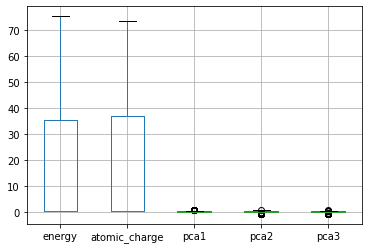

In [8]:
features = ['energy','atomic_charge','pca1', 'pca2', 'pca3']
Data.boxplot(features)


In [9]:
selected_features = ['atomic_charge','pca1','pca2','pca3']
X = Data[selected_features]

In [10]:
target =  ['energy']
y = Data[target]

In [11]:
from sklearn import preprocessing


In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.49793884, 0.96692397, 0.02907618, 0.58314676],
       [0.        , 0.51848025, 0.98027837, 0.14064268],
       [0.        , 0.28265645, 0.90226916, 0.93994165],
       ...,
       [0.49793884, 0.00970645, 0.49177648, 0.5941872 ],
       [1.        , 0.01015502, 0.49225789, 0.59452881],
       [0.        , 0.00219434, 0.49647249, 0.5942888 ]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.reshaping.flatten import Flatten
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(791, 4) (99, 4) (99, 4) (791, 1) (99, 1) (99, 1)


In [15]:
model = Sequential()
model.add(Dense(units = 48, input_dim = 4))
model.add(Dense(units = 48, activation='swish'))
model.add(Dense(units = 32, activation='swish'))
model.add(Dense(units = 32, activation='swish'))
model.add(Dense(units = 16, activation='swish'))
model.add(Flatten())
model.add(Dense(units = 1))

In [16]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [17]:
hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs = 200,
    validation_data=(X_val, Y_val)
)

Epoch 1/200
25/25 [==============================] - 2s 14ms/step - loss: 902.3541 - mae: 17.4972 - val_loss: 735.3570 - val_mae: 16.0846
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 661.3218 - mae: 17.1949 - val_loss: 360.9705 - val_mae: 16.9674
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 325.6328 - mae: 15.8328 - val_loss: 161.1357 - val_mae: 11.1064
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 79.2402 - mae: 7.1617 - val_loss: 7.3229 - val_mae: 2.2658
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 3.6966 - mae: 1.4689 - val_loss: 4.4500 - val_mae: 1.1612
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 2.7871 - mae: 1.1132 - val_loss: 3.4504 - val_mae: 1.1958
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 2.0902 - mae: 1.1253 - val_loss: 3.1585 - val_mae: 1.1893
Epoch 8/200
25/25 [==============================] - 0s 3ms/ste

In [18]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4025 - mae: 0.2522


[0.40251728892326355, 0.2522346079349518]

In [19]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

4/4 [==============================] - 0s 3ms/step - loss: 0.4025 - mae: 0.2522
Test loss: 0.403, Test MAE: 0.252


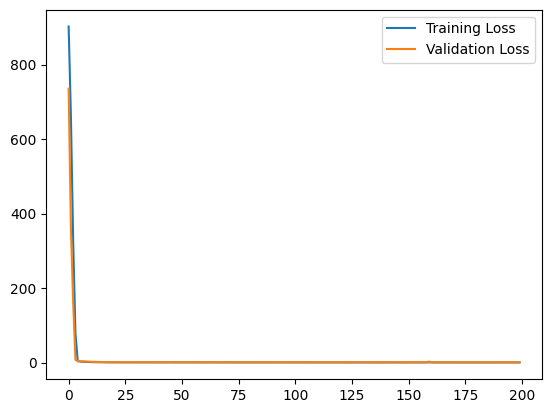

In [20]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [21]:
train_accuracy = 1 - hist.history['mae'][-1]
print(f"Training accuracy: {train_accuracy}")

Training accuracy: 0.7441351413726807
